<a href="https://colab.research.google.com/github/ipavlopoulos/palit/blob/main/code/fcnnr_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
# ACTION needed: download the data (with gdown or re-create using PaLit.xlsx)
!git clone https://github.com/ipavlopoulos/palit.git

In [ ]:
from palit.code.regression import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
pll = pd.read_pickle("pll.csv")
dataset = pll.explode("img")
dataset = dataset[dataset.img.notna()]
print("Lines num:", dataset.shape[0])

w,h = 300,50
img_data = pd.DataFrame(dataset.img.apply(lambda x: x.shape).tolist(), index=dataset.index, columns=["H", "W"])
dataset = dataset[(img_data.W>w)&(img_data.H>h)]
dataset.insert(0, "lid", range(1, dataset.shape[0]+1))

pll_train, pll_test = train_test_split(dataset, test_size=0.1, random_state=2023)
pll_train, pll_val = train_test_split(pll_train, test_size=pll_test.shape[0], random_state=2023)
print(pll_train.shape[0], pll_val.shape[0], pll_test.shape[0])

Lines num: 4717
2218 278 278


In [ ]:
# ACTION needed: download the checkpoing
net = Net()
net.load_state_dict(torch.load("cnn_reg_l039e180.pt", map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
test_loader = DataLoader(ImageDataset(pll_test, transform=rs_transform), batch_size=1)
predictions, labels = validate(net, test_loader, device="cpu")
print(nn.L1Loss()(torch.Tensor(predictions), torch.Tensor(labels)).numpy())

0.539179


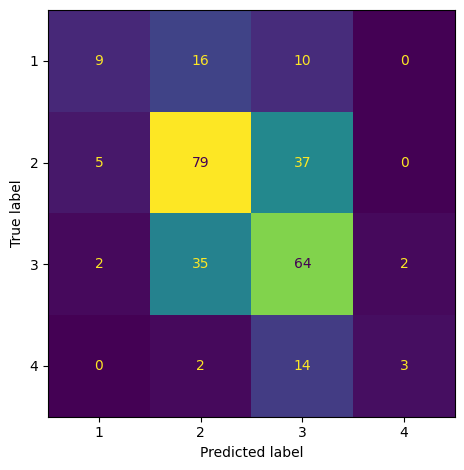

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns; sns.reset_orig();

ax = ConfusionMatrixDisplay.from_predictions([int(l) for l in labels], [round(p) for p in predictions], colorbar=False);
plt.tight_layout()
ax.figure_.savefig('confusion_reg.pdf', format='PDF', dpi=300)

In [ ]:
print(classification_report([int(l) for l in labels], [round(p) for p in predictions]))

              precision    recall  f1-score   support

           1       0.56      0.26      0.35        35
           2       0.60      0.65      0.62       121
           3       0.51      0.62      0.56       103
           4       0.60      0.16      0.25        19

    accuracy                           0.56       278
   macro avg       0.57      0.42      0.45       278
weighted avg       0.56      0.56      0.54       278

